## Module 1 Homework

In this homework, we're going to download finance data from various sources and make simple calculations/analysis.

---

In [74]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

import time
from datetime import date

import ta
import requests


### Question 1: [Macro] Average growth of GDP in 2023

**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). 
Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers).
Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer  5.7

---


In [75]:
# Get dates
end = date.today()
start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Year = {end.year}; month= {end.month}; day={end.day}')
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=24
Period for indexes: 1954-04-24 to 2024-04-24 


In [76]:
# Download Real Gross Domestic Product (GDPC1)
# https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [77]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1.tail()

,GDPC1,gdpc1_us_yoy,gdpc1_us_qoq
DATE,,,
2022-10-01,21989.981,0.006517,0.006354
2023-01-01,22112.329,0.017179,0.005564
2023-04-01,22225.350,0.023825,0.005111
2023-07-01,22490.692,0.029269,0.011939
2023-10-01,22679.255,0.031345,0.008384


In [78]:
# Filter data for 2023
gdpc1_2023 = gdpc1.loc['2023']

# Calculate average YoY growth in 2023
average_yoy_growth_2023 = gdpc1_2023['gdpc1_us_yoy'].mean()
average_yoy_growth_2023

0.02540443392867625

In [79]:
# Round the result to 1 decimal
# Convert to percentage and round
average_yoy_growth_2023 = round(average_yoy_growth_2023 * 100, 1)

print(f'Year = {end.year}; month= {end.month}; day={end.day}')
print(f'Period for indexes: {start} to {end} ')
print(f'Average YoY growth in 2023: {average_yoy_growth_2023}%')

Year = 2024; month= 4; day=24
Period for indexes: 1954-04-24 to 2024-04-24 
Average YoY growth in 2023: 2.5%


### Question 2. [Macro] Inverse "Treasury Yield"

**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**


Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2,
 https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.
    
(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

---

In [80]:
#Download DGS2 and DGS10 from FRED
start = date(2000, 1, 1)
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [81]:
#Join dgs2 and dgs10
df = pd.concat([dgs2, dgs10], axis=1)
df

,DGS2,DGS10
DATE,,
2000-01-03,6.38,6.58
2000-01-04,6.30,6.49
2000-01-05,6.38,6.62
2000-01-06,6.35,6.57
2000-01-07,6.31,6.52
...,...,...
2024-04-16,4.97,4.67
2024-04-17,4.93,4.59
2024-04-18,4.98,4.64


In [82]:
# Calculate the difference between DGS2 and DGS10
df['difference'] = df['DGS10'] - df['DGS2']
df

,DGS2,DGS10,difference
DATE,,,
2000-01-03,6.38,6.58,0.20
2000-01-04,6.30,6.49,0.19
2000-01-05,6.38,6.62,0.24
2000-01-06,6.35,6.57,0.22
2000-01-07,6.31,6.52,0.21
...,...,...,...
2024-04-16,4.97,4.67,-0.30
2024-04-17,4.93,4.59,-0.34
2024-04-18,4.98,4.64,-0.34


In [83]:
# Find the min value of (dgs10-dgs2)
# Round to 1 digit after the decimal point

min_difference = round(df['difference'].min(), 1)
min_difference

-1.1

In [84]:
print(f"The min value of (dgs10-dgs2) since 2000-01-01 is: {min_difference}")

The min value of (dgs10-dgs2) since 2000-01-01 is: -1.1


**Additional:** think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?

The "inverted yield curve" occurs when short-term interest rates are higher than long-term interest rates, indicating a possible economic downturn. It may indicate reduced economic growth, which will affect investor sentiment and investment decisions. In some cases, it precedes recessions. It could be a valuable predictive feature for models due to its historical correlation with economic downturns.

### Question 3. [Index] Which Index is better recently?

**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

---

In [85]:
#Define dates
start_date = "2019-04-09"
end_date = "2024-04-09"

#Download S&P 500
sp500 = yf.download(tickers="^GSPC", start=start_date, end=end_date, interval="1d")

#Download IPC Mexico
ipc_mex = yf.download(tickers="^MXX", start=start_date, end=end_date, interval="1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [86]:
# Calculate growth
sp500_growth = (sp500['Close'].iloc[-1] / sp500['Close'].iloc[0]) - 1

ipc_mex_growth= (ipc_mex['Close'].iloc[-1] / ipc_mex['Close'].iloc[0]) - 1

In [87]:
#  Select the higher growing index and write down the growth in %

if sp500_growth > ipc_mex_growth:
    print(f"S&P 500 index had the higher growth at {round(sp500_growth * 100)}%.")
else:
    print(f"IPC Mexico index had the higher growth at {round(ipc_mex_growth * 100)}%.")

S&P 500 index had the higher growth at 81%.


**Additional:** think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [88]:
# Most common stock index
indexes = [
    "^GSPC",  # S&P 500
    "^IXIC",  # Nasdaq Composite
    "^DJI",   # Dow Jones Industrial Average
    "^FTSE",  # FTSE 100
    "^GDAXI", # DAX
    "^N225",   # Nikkei 225
]

# Download data
data = {}
for index in indexes:
    ticker = yf.Ticker(index)
    data[index] = ticker.history(period="max")

# Calculate the 10-year and 20-year CAGR
cagr_10 = {}
cagr_20 = {}
for index, df in data.items():
    start_10 = df.index[-251 * 10]
    start_20 = df.index[-251 * 20]
    end = df.index[-1]
    
    cagr_10[index] = ((df.loc[end, 'Close'] / df.loc[start_10, 'Close'])**(1/10)) - 1
    cagr_20[index] = ((df.loc[end, 'Close'] / df.loc[start_20, 'Close'])**(1/20)) - 1

# Results
print("10-year CAGR:")
for index, cagr in cagr_10.items():
    print(f"{index}: {round(cagr * 100, 2)}%")

print("\n")

print("20-year CAGR:")
for index, cagr in cagr_20.items():
    print(f"{index}: {round(cagr * 100, 2)}%")

10-year CAGR:
^GSPC: 10.51%
^IXIC: 14.43%
^DJI: 8.9%
^FTSE: 1.62%
^GDAXI: 6.19%
^N225: 9.31%


20-year CAGR:
^GSPC: 7.96%
^IXIC: 11.13%
^DJI: 6.96%
^FTSE: 2.96%
^GDAXI: 8.0%
^N225: 6.44%


In [89]:
#CRIPTO
from datetime import datetime

# Define the cryptocurrency index symbols
crypto_indices = [
    'BTC-USD',  # Bitcoin
    'ETH-USD',  # Ethereum
    'XRP-USD',  # Ripple
    'LTC-USD',  # Litecoin
    'BCH-USD',  # Bitcoin Cash
    'ADA-USD'   # Cardano
]

# Download historical data for each cryptocurrency index
crypto_data = {}
for index in crypto_indices:
    crypto_data[index] = yf.download(index, start='2010-01-01', end=datetime.today().strftime('%Y-%m-%d'))

# Calculate the Compound Annual Growth Rate (CAGR) since the beginning of the cryptocurrency market for each index
cagr_since_start = {}
for index, data_df in crypto_data.items():
    if len(data_df) == 0:
        print(f"No data available for index {index}")
        continue
    
    # Get the start and end dates to calculate CAGR since the beginning
    start_date = data_df.index[0]
    end_date = data_df.index[-1]
    
    # Calculate the CAGR since the beginning
    cagr_since_start[index] = ((data_df.loc[end_date, 'Close'] / data_df.loc[start_date, 'Close'])**(1 / ((end_date - start_date).days / 365))) - 1

# Print the results of CAGR since the beginning
print("CAGR since the beginning of the cryptocurrency market:")
for index, cagr in cagr_since_start.items():
    start_date = crypto_data[index].index[0].date() 
    print(f"{index} (Comparison date: {start_date}): {round(cagr * 100, 2)}%")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

CAGR since the beginning of the cryptocurrency market:
BTC-USD (Comparison date: 2014-09-17): 67.91%
ETH-USD (Comparison date: 2017-11-09): 42.92%
XRP-USD (Comparison date: 2017-11-09): 15.29%
LTC-USD (Comparison date: 2014-09-17): 34.16%
BCH-USD (Comparison date: 2017-11-09): -3.92%
ADA-USD (Comparison date: 2017-11-09): 53.03%


### Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks


**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**


Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.
Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

---

In [90]:
# Download data 

stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
data = {}
for stock in stocks:
    data[stock] = yf.download(stock, start="2023-01-01", end="2023-12-31")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [91]:
# Calculate maximum-minimim "Adj.Close" price for each stock 
price_diff = {}
for stock, df in data.items():
    price_diff[stock] = df['Adj Close'].max() - df['Adj Close'].min()

In [92]:
# Max price for each stock
max_adj_close = {stock: df['Adj Close'].max() for stock, df in data.items()}

In [93]:
# Divide it by the maximum "Adj.Close" value
result = {stock: diff / max_adj_close[stock] for stock, diff in price_diff.items()}


In [94]:
# Round the result to two decimal places
rounded_result = {stock: round(value, 2) for stock, value in result.items()}

In [95]:
# All results
print("Stock   |   Result")
print("------------------")
for stock, value in rounded_result.items():
    print(f"{stock}: {value}")

Stock   |   Result
------------------
2222.SR: 0.21
BRK-B: 0.21
AAPL: 0.37
MSFT: 0.42
GOOG: 0.39
JPM: 0.28


In [96]:
# Find the stock with the highest rank ratio
max_range_ratio_stock = max(result, key=result.get)
max_range_ratio = result[max_range_ratio_stock]

# Result
print(f"The largest range ratio is {max_range_ratio_stock} with a ratio of {round(max_range_ratio,2)}")

The largest range ratio is MSFT with a ratio of 0.42


**Additional:** why this may be important for your research?

It is another indicator that helps in making informed decisions, calculating the 52-week range index helps in evaluating market volatility, risk management, market trends and historical performance.

### Question 5. [Stocks] Dividend Yield
**Find the largest dividend yield for the same set of stocks**

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023.
You can use `get_actions()` method or `.dividends` field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximum value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

---

In [97]:
# Download data 

stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
data = {}
for stock in stocks:
    # Get dividend data for the stock in 2023
    dividends = yf.Ticker(stock).dividends
    dividends_2023 = dividends.loc['2023-01-01':'2023-12-31']  # Filter 2023
    total_dividends = dividends_2023.sum() 

    # Get the closing price (Adj.Close) on the last trading day of the year
    last_day_price = yf.Ticker(stock).history(period='1y')['Close'][-1]

    # Divide the dividend sum by the closing price
    data[stock] = total_dividends / last_day_price

In [98]:
# All stocks Results
print("Dividends paid in 2023 per company divided by closing price on the last trading day of the year:")
for stock, value in data.items():
    print(f"{stock}: {round(value * 100, 1)}%")

Dividends paid in 2023 per company divided by closing price on the last trading day of the year:
2222.SR: 3.0%
BRK-B: 0.0%
AAPL: 0.6%
MSFT: 0.7%
GOOG: 0.0%
JPM: 2.1%


In [99]:
# Find the largest dividend yield
max_dividend_stock, max_dividend_percentage = max(data.items(), key=lambda x: x[1])

# Round
max_dividend_percentage_rounded = round(max_dividend_percentage * 100, 1)

# Result
print(f"Company with maximum dividend percentage in 2023 is {max_dividend_stock} percentage: {max_dividend_percentage_rounded}")



Company with maximum dividend percentage in 2023 is 2222.SR percentage: 3.0


### Question 6. [Exploratory] Investigate new metrics

**Free text answer**

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

---

To analyze Bitcoin price behavior, I chose the Relative Strength Index (RSI) and the Moving Average Convergence and Divergence (MACD) are two popular technical indicators that can provide valuable information.

The RSI is a momentum indicator that measures the speed and change of price movements. It helps identify overbought and oversold conditions in a market. This is useful for detecting potential turning points in the Bitcoin price trend and making buy or sell decisions accordingly.

On the other hand, the MACD is a trend-following indicator that shows the relationship between two price moving averages. It consists of a MACD line and a signal line, as well as a histogram showing the difference between these two lines. Crossovers between the MACD line and the signal line can indicate changes in the direction of the Bitcoin price trend.

By including RSI and MACD in the analysis of Bitcoin prices, we can gain a more complete view of market dynamics and be better equipped to identify investment opportunities or make informed trading decisions. These indicators can provide early signals of changes in price direction, which can be crucial for investors and traders looking to maximize profits and minimize losses in the cryptocurrency market.

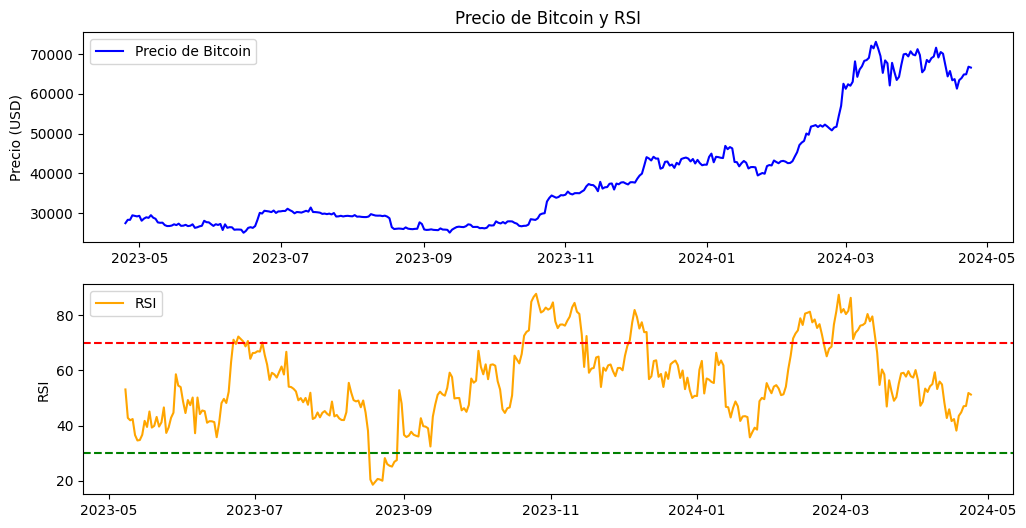

In [100]:
# Download Bitcoin price data from CoinGecko API
def fetch_bitcoin_price_data():
    url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=365'
    response = requests.get(url)
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    return df

# RSI Calc
def calculate_rsi(data, window=14):
    rsi = ta.momentum.RSIIndicator(data['price'], window=window)
    return rsi.rsi()

# Download Bitcoin price
bitcoin_price_data = fetch_bitcoin_price_data()

# RSI Calc
bitcoin_price_data['RSI'] = calculate_rsi(bitcoin_price_data)

# Chart Bitcoin Prices and RSI
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(bitcoin_price_data['price'], label='Precio de Bitcoin', color='blue')
plt.title('Precio de Bitcoin y RSI')
plt.ylabel('Precio (USD)')
plt.legend(loc='upper left')
plt.subplot(2, 1, 2)
plt.plot(bitcoin_price_data['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.ylabel('RSI')
plt.legend(loc='upper left')
plt.show()


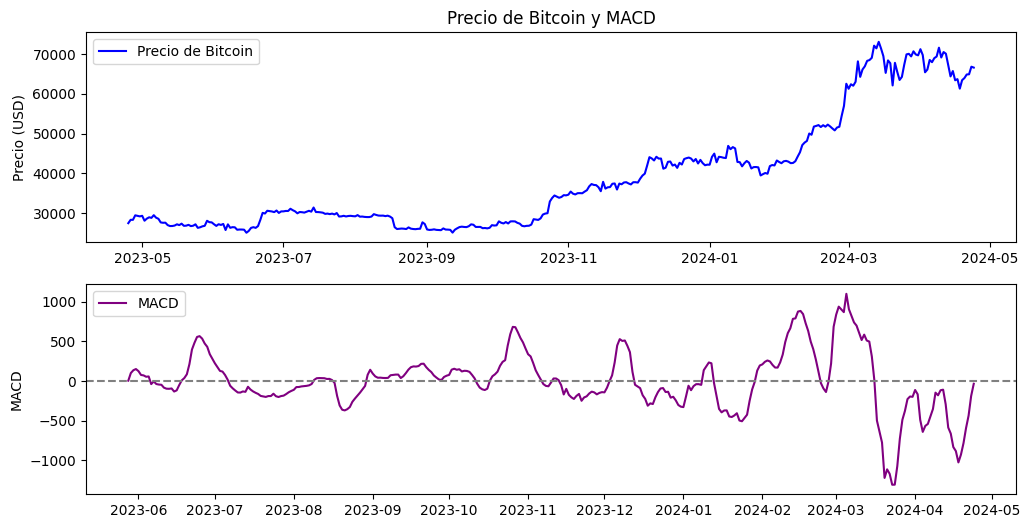

In [101]:
# Download Bitcoin price data from CoinGecko API
def fetch_bitcoin_price_data():
    url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=365'
    response = requests.get(url)
    data = response.json()
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    return df

# MACD Calc
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    macd = ta.trend.macd_diff(data['price'], window_fast=short_window, window_slow=long_window, window_sign=signal_window)
    return macd

# Download Bitcoin price
bitcoin_price_data = fetch_bitcoin_price_data()

# MACD calc
bitcoin_price_data['MACD'] = calculate_macd(bitcoin_price_data)

# Chart Bitcoin Prices and MACD
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(bitcoin_price_data['price'], label='Precio de Bitcoin', color='blue')
plt.title('Precio de Bitcoin y MACD')
plt.ylabel('Precio (USD)')
plt.legend(loc='upper left')
plt.subplot(2, 1, 2)
plt.plot(bitcoin_price_data['MACD'], label='MACD', color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.ylabel('MACD')
plt.legend(loc='upper left')
plt.show()


### Question 7. [Exploratory] Time-driven strategy description around earnings releases

**Free text answer**

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08). 

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.



The strategy could begin by collecting data on future earnings reporting dates. These dates could then be compared to previous earnings reports to identify patterns or trends in stock behavior before and after earnings reports.

The idea would be to analyze the historical volatility of each company's shares before and after earnings reports. Those companies that have experienced high volatility in the past could be selected as candidates for further analysis, as volatility often presents trading opportunities. Additionally, the direction of stock price movement (bullish or bearish) before and after earnings reports could be considered to identify possible behavioral patterns.

Another approach could be to analyze the relationship between stock performance and market expectations ahead of earnings reports. Those companies whose shares have shown performance significantly different from market expectations could be subject to further analysis, as this could indicate a trading opportunity based on discrepancies between expectations and actual results.


## Submitting the solutions

Form for submitting: https://courses.datatalks.club/sma-zoomcamp-2024/homework/hw01